### Name: Sohan Rudra
### Roll No: 16MA20054

In [1]:
#library imports
import math
import time
from collections import namedtuple
from fractions import Fraction 
from copy import copy
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%matplotlib notebook

In [2]:
#some boilerplate code
x = symbols('x')
#Equation = namedtuple('Equation',('alpha'))
Conditions = namedtuple('Conditions',('dx','x0','xn','dt','tn','u'))

In [17]:
%%latex
\begin{align}
u_{tt} + u_{xx} = 0\\
u(x,0)= sin(\pi x)\\
\
\frac{\partial u(x, 0)}{\partial t} = 0 \\
u(0,t) = u(1,t) = 0 \\
0 \leq x \leq L
\end{align}

<IPython.core.display.Latex object>

In [4]:
def initilize(cond):
    nx = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    x_s = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
    u = np.zeros(nx+1)
    for i, xi in enumerate(x_s):
        u[i] = cond.u.subs(x, xi)
    return u

In [5]:
def Upwind_SOLVER(cond, solsn = None, solsn1 = None, init=True):
    nx = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    u = copy(solsn)
    nu = (cond.dt/cond.dx)**2
    if init:
        for i in range(1,nx-1):
            u[i] = solsn[i] - nu/2.0 * (solsn[i+1] - 2.0*solsn[i] + solsn[i-1])
    else:
        for i in range(1,nx-1):
            u[i] = 2.0*solsn[i] - solsn1[i] - nu * (solsn[i+1] - 2.0 * solsn[i] + solsn[i-1])
    return u

In [11]:
def Solver(cond):
    U_solve = []
    u_i = initilize(cond)
    U_solve.append(u_i)
    u_k = Upwind_SOLVER(cond, u_i, init=True)
    u_k_o = copy(u_k)
    for _ in range(cond.tn):
        u_i = copy(u_k)
        U_solve.append(u_i)
        u_k = Upwind_SOLVER(cond, u_i, u_k_o, init=False)
        u_k_o = copy(u_i)
    U_solve.append(u_k)
    return U_solve

In [12]:
cond = Conditions(0.1,0,1.0,0.1,10,sin(np.pi*x))
u = Solver(cond)
len(u)

12

11


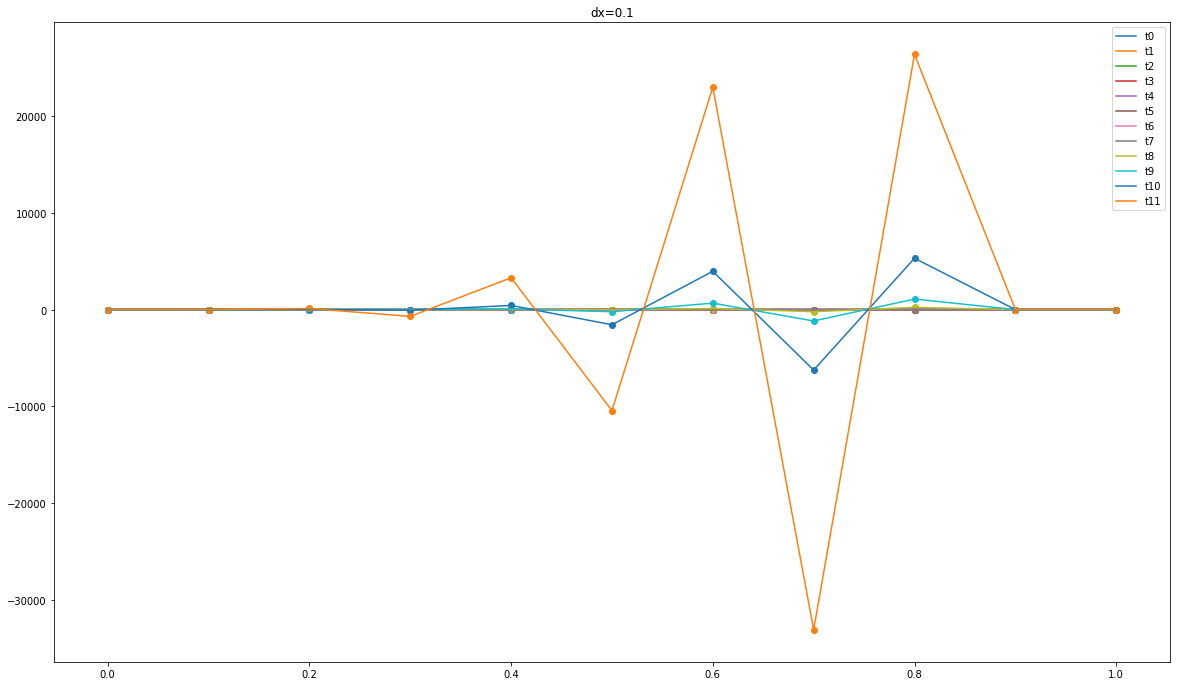

In [13]:
n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
dt = cond.dt
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(311)
ax.set_title("dx=0.1")
g = []
print(len(u[0]))
for i in range(len(u)):
    x_range = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
    if (x_range.shape[0] == 12):
        x_range = x_range[:-1]
    ax.plot(x_range, u[i])
    ax.scatter(x_range, u[i])
    g.append("t"+str(i))
ax.legend(tuple(g))
fig.show()

In [14]:
cond = Conditions(0.01,0,1.0,0.1,10,sin(np.pi*x))
u = Solver(cond)
len(u)

12

101


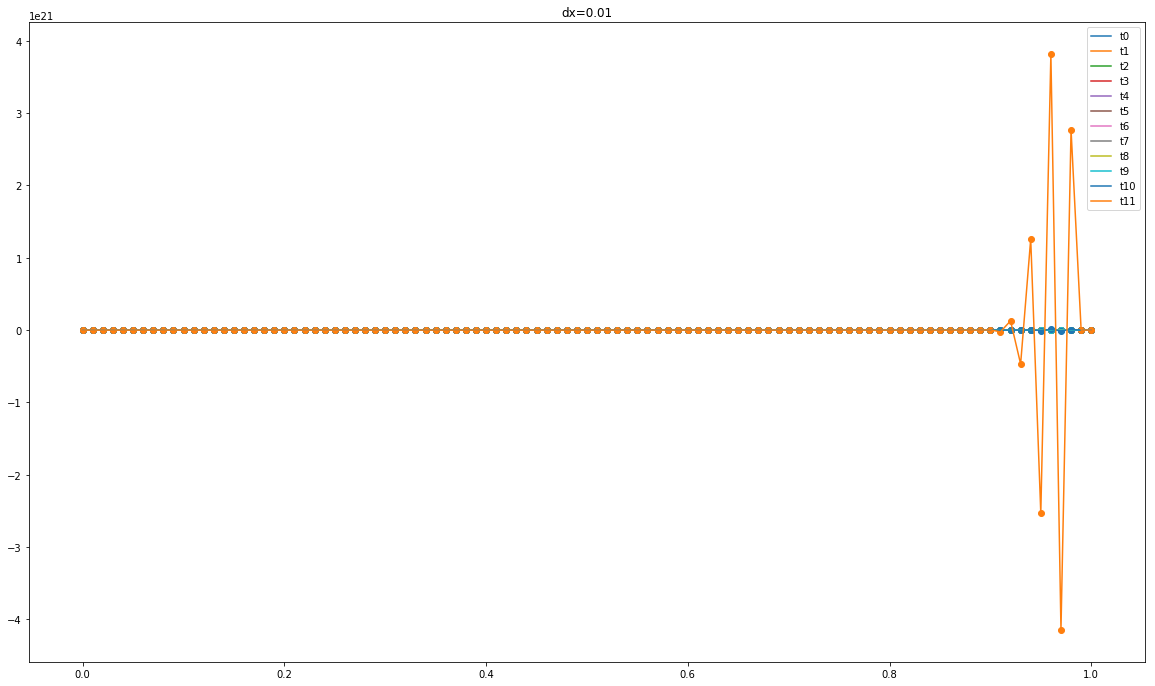

In [18]:
n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
dt = cond.dt
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(311)
ax.set_title("dx=0.01")
g = []
print(len(u[0]))
for i in range(len(u)):
    x_range = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
    if (x_range.shape[0] == len(u[0]) + 1):
        x_range = x_range[:-1]
    ax.plot(x_range, u[i])
    ax.scatter(x_range, u[i])
    g.append("t"+str(i))
ax.legend(tuple(g))
fig.show()